In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1)	Create Use the Dataset named Market_Basket_Optimisation to build an apriori algorithm to solve the below questions
    • Find the top 10 rules when making buy 1 get 1 free offer.
    • What change can you see in the rules, if the offer is changes as buy 2 get 2 free?


In [3]:
market_basket_data = pd.read_csv('Market_Basket_Optimisation.csv',header=None)
market_basket_data.head()  # read the dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
market_basket_data.shape 

(7501, 20)

In [5]:
market_data = market_basket_data.copy() # Create a copy of dataset

In [6]:
# There are so many Empty or NAN value so just replace with 'nan' as string because of we will handle easily
market_data = market_data.fillna('nan') 

In [7]:
# combine all the columns
market_data['combined'] = market_data.values.tolist()

In [8]:
market_data['combined'].head()

0    [shrimp, almonds, avocado, vegetables mix, gre...
1    [burgers, meatballs, eggs, nan, nan, nan, nan,...
2    [chutney, nan, nan, nan, nan, nan, nan, nan, n...
3    [turkey, avocado, nan, nan, nan, nan, nan, nan...
4    [mineral water, milk, energy bar, whole wheat ...
Name: combined, dtype: object

In [9]:
# convert combine dataset into list 
data_list = list(market_data['combined']) 

In [10]:
market_data['combined'].head()

0    [shrimp, almonds, avocado, vegetables mix, gre...
1    [burgers, meatballs, eggs, nan, nan, nan, nan,...
2    [chutney, nan, nan, nan, nan, nan, nan, nan, n...
3    [turkey, avocado, nan, nan, nan, nan, nan, nan...
4    [mineral water, milk, energy bar, whole wheat ...
Name: combined, dtype: object

In [11]:
# Before handle nan values
print(data_list[0:5]) # print first 5 list 

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']]


In [12]:
# here Remove or ignore all the 'nan' values
item_list = []  
for lst in data_list:
#     print(lst)
    items = []
    for ele in lst:
        if ele != 'nan':
#             print(ele)
            items.append(ele)
    item_list.append(items)

In [13]:
# After handle 'nan' values
print(item_list[0:5]) # print first 5 item_list

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]


**Implemention of apriori algorithm**

In [14]:
from apyori import apriori

In [15]:
# These all are parameters used in apriori algo.
# These all are parameters can be change according to the requirements.

minimum_support = 0.003       
minimum_confidence = 0.50
min_lift = 3
min_length = 2

In [16]:
association_rules = apriori(item_list, min_support = minimum_support, 
                            min_confidence = minimum_confidence, 
                            min_lift = min_lift, 
                            min_length = min_length)
association_results = list(association_rules)

In [17]:
print(len(association_results)) # Based on the above parameters number of association rules

14


• Find the top 10 rules when making buy 1 get 1 free offer.

In [18]:
association_results[0:10]

[RelationRecord(items=frozenset({'spaghetti', 'ground beef', 'cereals'}), support=0.0030662578322890282, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef', 'cereals'}), items_add=frozenset({'spaghetti'}), confidence=0.6764705882352942, lift=3.8853031258445188)]),
 RelationRecord(items=frozenset({'chicken', 'olive oil', 'milk'}), support=0.0035995200639914677, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken', 'olive oil'}), items_add=frozenset({'milk'}), confidence=0.5, lift=3.858539094650206)]),
 RelationRecord(items=frozenset({'spaghetti', 'ground beef', 'cooking oil'}), support=0.004799360085321957, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef', 'cooking oil'}), items_add=frozenset({'spaghetti'}), confidence=0.5714285714285714, lift=3.2819951870487856)]),
 RelationRecord(items=frozenset({'eggs', 'red wine', 'spaghetti'}), support=0.0037328356219170776, ordered_statistics=[OrderedStatistic(items_base=frozenset({'egg

In [19]:
# e.g - Look at the first rule
print(association_results[0])

RelationRecord(items=frozenset({'spaghetti', 'ground beef', 'cereals'}), support=0.0030662578322890282, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef', 'cereals'}), items_add=frozenset({'spaghetti'}), confidence=0.6764705882352942, lift=3.8853031258445188)])


1. In first rule you can that **support=0.0030662578322890282** means among all the transactions of store 0.003% transaction will show that **spaghetti, ground beef, cereals** purchased together.

2. Here **confidence=0.6764705882352942** means the rule is saying if a customer buy **ground beef and cereals** there is a **67%** chance that person will buy a **spaghetti** item or we can say that 67% of the customer who purchased **ground beef and cereals** also puchased the **spaghetti**.

Based on these rules we can create diffrent-diffrent discount offers for the customers.

### Maximum Sold Items

In [20]:
data = market_basket_data.values.ravel() # ravel fuction used for 2d array to 1d array

In [21]:
item_df = pd.DataFrame(data,columns=['items'])

**Top 10 maximum sold items**

In [22]:
item_df['items'].value_counts()[:10] 

mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1230
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
Name: items, dtype: int64

In [23]:
idx = item_df['items'].value_counts().index[:10]
val = item_df['items'].value_counts().values[:10]

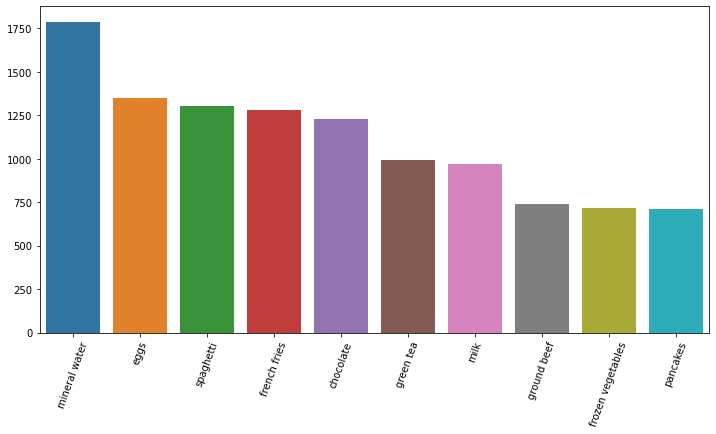

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x = idx, y = val)
plt.xticks(rotation = 70);

### Minimum Sold Items

In [25]:
item_df['items'].value_counts()[::-1][:10] # top 10 items

 asparagus          1
water spray         3
napkins             5
cream               7
bramble            14
tea                29
mashed potato      31
chutney            31
chocolate bread    32
oatmeal            33
Name: items, dtype: int64

**End**